# CUTI/BEUTI

### Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load files into a data frame

In [2]:
filename1 = 'CUTI_monthly.csv'
filename2 = 'BEUTI_monthly.csv'
df_c = pd.read_csv(filename1, na_values=-999)
df_b = pd.read_csv(filename2, na_values=-999)

### Subset by year and location

In [3]:
df_c['Date'] = pd.to_datetime(df_c[['year', 'month']].assign(day=1))
df_b['Date'] = pd.to_datetime(df_b[['year', 'month']].assign(day=1))
df_c = df_c.sort_values('Date')
df_b = df_b.sort_values('Date')
df_c = df_c[(df_c['Date'].dt.year >= 2008) & (df_c['Date'].dt.year <= 2023)] #2008-2023
df_b = df_b[(df_c['Date'].dt.year >= 2008) & (df_b['Date'].dt.year <= 2023)] #2008-2023

df_c = df_c[['Date', '37N']]
df_b = df_b[['Date', '37N']]
df_b.set_index(['Date'], inplace=True)
df_c.set_index(['Date'], inplace=True)
df_c['cute'] = df_c['37N']
df_merge = df_b.join(df_c['cute'], how='left')
df_merge = df_merge.reset_index(drop=False)

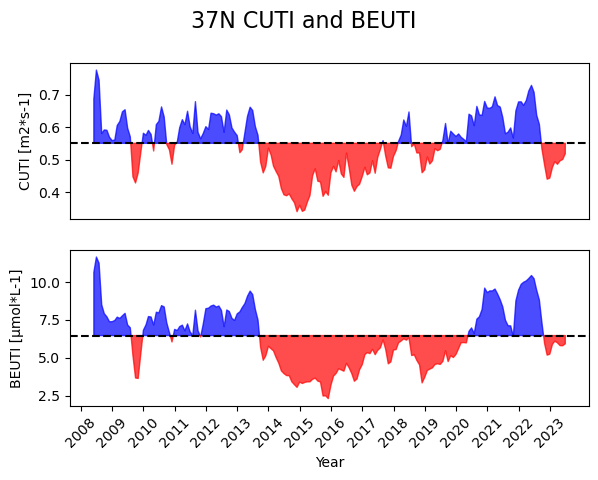

In [4]:
x = df_merge['Date'] 
y = df_merge['cute'] 
y2 = df_merge['37N'] 

y_avg = df_c['37N'].mean()
y_avg2 = df_b['37N'].mean()

yr = y.rolling(window=11, center=True).mean() #Set a rolling average
yr2 = y2.rolling(window=11, center=True).mean() #Set a rolling average

plt.figure(figsize=(6, 5))
plt.suptitle('37N CUTI and BEUTI', fontsize=16, y=0.95)
plt.subplot(2, 1, 1)

plt.fill_between(x, y_avg, yr, where=(yr > y_avg), interpolate=True, color='blue', alpha=0.7)
plt.fill_between(x, yr, y_avg, where=(yr < y_avg), interpolate=True, color='red', alpha=0.7)
plt.axhline(y_avg, color='black', linestyle='--')
plt.ylabel('CUTI [m2*s-1]')
plt.gca().set_xticks([])

ax2 = plt.subplot(2, 1, 2)
plt.fill_between(x, y_avg2, yr2, where=(yr2 > y_avg2), interpolate=True, color='blue', alpha=0.7)
plt.fill_between(x, yr2, y_avg2, where=(yr2 < y_avg2), interpolate=True, color='red', alpha=0.7)
plt.axhline(y_avg2, color='black', linestyle='--')
plt.ylabel('BEUTI [μmol*L-1]')

years = sorted(df_merge['Date'].dt.year.unique())
tick_positions = [pd.Timestamp(f"{year}-01-01") for year in years]
ax2.set_xticks(tick_positions)
ax2.set_xticklabels([str(year) for year in years], rotation=45)

plt.xlabel('Year')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.2)
plt.style.use('default')
#plt.savefig("Seasonal_images/Yearly_37_CUTI_BEUTI_W11.png", dpi=300, bbox_inches='tight')
plt.show()